In [284]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import BinaryAccuracy
import matplotlib.pyplot as plt

In [285]:
batch_size = 32
img_height = 64
img_width = 64
data_dir = '/Users/aryamaan/Desktop/Coding/ML-LS/Week-2/homer_bart'
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 269 files belonging to 2 classes.


In [286]:
data = data.map(lambda x,y: (x/255,y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [287]:
train_size = int(len(data)*0.9)
test_size = int(len(data)*0.1) + 1

In [288]:
batch[0].max()

1.0

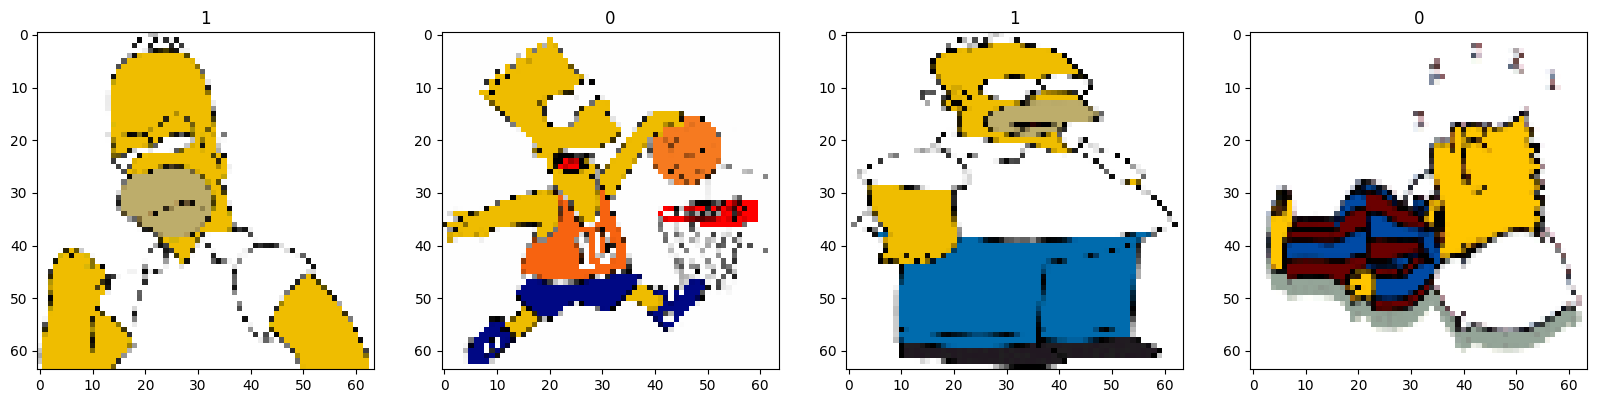

In [289]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [290]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [291]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [292]:
model.compile(
    loss=tf.losses.BinaryCrossentropy(),
    metrics = ["accuracy"],
)

In [293]:
hist = model.fit(train, epochs=5)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5748 - loss: 10.1248
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6958 - loss: 0.6502
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7177 - loss: 0.6607
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8040 - loss: 0.4206
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8295 - loss: 0.3521


In [295]:
acc = BinaryAccuracy()
for batch in test:
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y,yhat)

print(f'Accuracy: {acc.result()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Accuracy: 0.9230769276618958


2024-07-13 18:21:19.012001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
